<a href="https://colab.research.google.com/github/RaoUmair98/BirdsCLEF-Voice/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
import quandl, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

%matplotlib inline

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [282]:
df.describe()

,age,bmi,children,charges,label,Forecast
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1.000000
mean,39.190726,30.664589,1.095737,13258.551706,13267.718823,13225.667502
std,14.042556,6.100313,1.205571,12106.752783,12114.138668,NaN
min,18.000000,15.960000,0.000000,1121.873900,1121.873900,13225.667502
25%,27.000000,26.290000,0.000000,4738.268200,4738.268200,13225.667502
50%,39.000000,30.400000,1.000000,9377.904700,9377.904700,13225.667502
75%,51.000000,34.700000,2.000000,16586.497710,16586.497710,13225.667502
max,64.000000,53.130000,5.000000,63770.428010,63770.428010,13225.667502


In [226]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [227]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [197]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [228]:
df = df[['age','bmi','children','charges']]
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [288]:
x = df[['age','bmi','children','charges']]

## Linear Regression Model

In [337]:
pre_col = 'charges'
pre_out = int(math.ceil(0.000225* len(df)))
df['label'] = df[pre_col].shift(-pre_out)
df.dropna(inplace=True)
x = np.array(df.drop(['label'],1))
y = np.array(df['label'])

df.dropna(inplace=True)

In [230]:
x= preprocessing.scale(x)
y = np.array(df['label'])
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(x_train,y_train)
confidence = clf.score(x_test,y_test) 
print(confidence)


-0.017620549215669357


In [231]:
x_lately = x[-pre_out:]
df.dropna(inplace=True)
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train,y_train)
confidence = clf.score(x_test,y_test) 
print(confidence)



-0.017620549215669357


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [232]:
forecast_set = clf.predict(x_lately)

In [233]:
df['Forecast'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [234]:
last_day = df.iloc[-1].name
one_day = 86400
next_unix = last_day + one_day

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


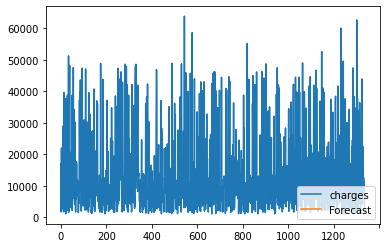

In [235]:
import datetime

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix +=86400
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['charges'].plot()
df['Forecast'].plot()
plt.legend(loc=4)

plt.show()  


In [294]:
x = df[["charges"]]
y = df["age"]
lr = LinearRegression()
lr.fit(x, y)
yhat = lr.predict(x)
pd.DataFrame({"Age": y, "Predicted": yhat}).head()

,Age,Predicted
0,19,40.460923
1,18,35.202024
2,28,36.146968
3,33,42.229994
4,32,35.944858


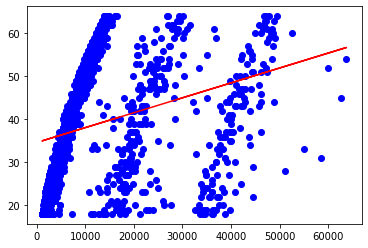

In [295]:
plt.scatter(x, y, color = "blue")
plt.plot(x, yhat, "r")
plt.show()

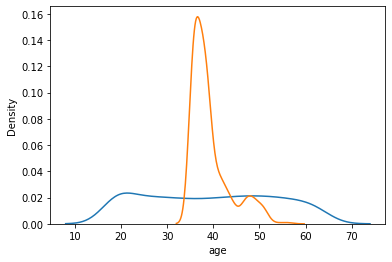

In [296]:
sns.kdeplot(data = df, x = y)
sns.kdeplot(data = df, x = yhat)
plt.show()

In [297]:
r_squared = lr.score(x, y)
r_squared

0.08940589967885781

In [298]:
X = df[['age','bmi','children']]
y = df["charges"]

In [299]:
lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [300]:
yhat = lr.predict(X)
pd.DataFrame({"Actual": y, "Predicted": yhat}).head()

,Actual,Predicted
0,16884.92400,6908.777533
1,1725.55230,9160.977061
2,4449.46200,12390.946918
3,21984.47061,8543.527095
4,3866.85520,10354.147396


In [301]:
lr.score(X, y)


0.12009819576246927

In [302]:
X = df[['age','bmi','children']]
y = df["charges"]
lr.fit(X, y)
yhat = lr.predict(X)
pd.DataFrame({"Actual": y, "Predicted": yhat}).head()

,Actual,Predicted
0,16884.92400,6908.777533
1,1725.55230,9160.977061
2,4449.46200,12390.946918
3,21984.47061,8543.527095
4,3866.85520,10354.147396


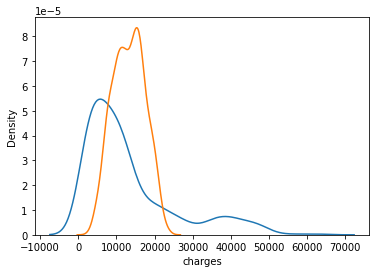

In [303]:
sns.kdeplot(data = df, x = y)
sns.kdeplot(data = df, x = yhat)
plt.show()

In [304]:
lr.score(X, y)


0.12009819576246927

## Polynomial Linear Regression

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [237]:
data = data[['age','bmi','children','charges']]
data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [316]:
x = data['children']
y = data['charges']



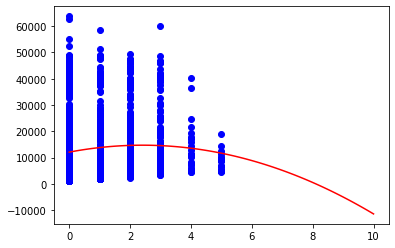

In [317]:
my_model = np.poly1d(np.polyfit(x, y, 2))
myline = np.linspace(0, 10, 100)
plt.scatter(x, y, color = "blue")
plt.plot(myline, my_model(myline), color ="r")
plt.show()

In [318]:
x.shape

(1338,)

In [324]:
X = df[["children"]]
y = df["charges"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 2)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
ypipe[0:5]

array([12076.00132468, 13812.09703899, 14560.23946723, 12076.00132468,
       12076.00132468])

In [334]:
X = df[["children"]]
y = df["charges"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 3)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
ypipe[0:5]

array([12328.84632933, 12972.51856857, 15628.78340208, 12328.84632933,
       12328.84632933])

## Graphs

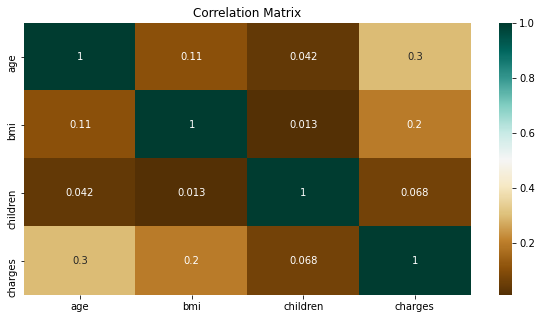

In [336]:
plt.figure(figsize = (10, 5))
c = df.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)
plt.title("Correlation Matrix")
plt.show()

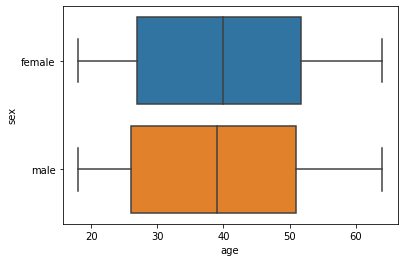

In [ ]:
sns.boxplot(x = "age", y = "sex", data = df)


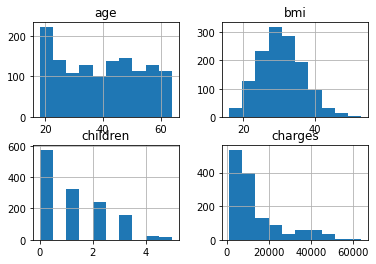

In [ ]:
x.hist()
plt.show()

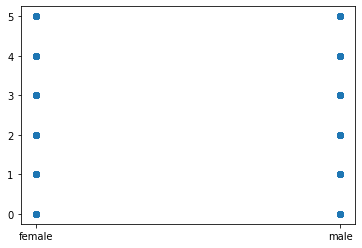

In [ ]:
plt.scatter(x = df["sex"], y = df["children"])
plt.show()

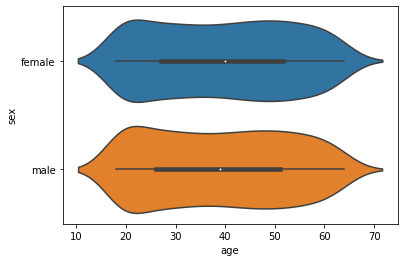

In [ ]:
sns.violinplot(x = "age", y = "sex", data = df)
